<a href="https://colab.research.google.com/github/IanAlves21/Funcoes-de-Ativacao-RNA/blob/main/Fun%C3%A7%C3%B5es_de_Ativa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [21]:
# Célula reservada para importar bibliotecas
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [22]:
# geração dos pontos do eixo X, intervalo fechado de [-4.0 , 4.0]
eixo_x = np.arange(-4.0, 4.1, 0.1)       
for i in range(len(eixo_x)):
  eixo_x[i] = round(eixo_x[i], 2)

In [23]:
print("O espaço de entrada é preenchido com {} amostras".format(len(eixo_x)))

O espaço de entrada é preenchido com 81 amostras


In [24]:
print("O tipo desde dados de entrada é: {}".format(type(eixo_x[0])))

O tipo desde dados de entrada é: <class 'numpy.float64'>


In [25]:
print("O espaço de entrada é da seguinte forma:\n {}".format(eixo_x))

O espaço de entrada é da seguinte forma:
 [-4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7
 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3
 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1
  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5
  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [65]:
# Definição da funcao de ativação sigmoide
def sigmoide(x, beta):
  beta = beta
  num = 1.0
  den = (1.0 + math.exp(-beta*x))
  ans = num/den
  return ans

# Definição da derivada da funcao de ativação sigmoide
def derivada_sigmoide(x, beta):
  beta = beta
  num = beta * math.exp(beta*x)
  den = pow((math.exp(beta*x) + 1.0), 2)
  ans = num/den
  return ans

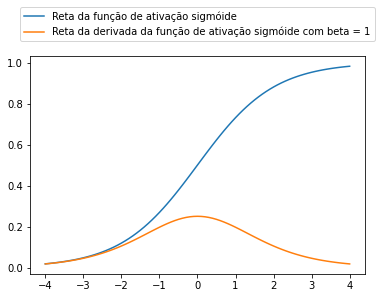

In [59]:
# Plot do grafico da funcao sigmóide para intervalo predefinido

eixo_y = np.zeros(len(eixo_x))
eixo_y_derivado = np.zeros(len(eixo_x))
for i in range(len(eixo_x)):
  eixo_y[i] = sigmoide(eixo_x[i], 1.0)
  eixo_y_derivado[i] = derivada_sigmoide(eixo_x[i], 1.0)

plt.plot(eixo_x, eixo_y, label = "Reta da função de ativação sigmóide")
plt.plot(eixo_x, eixo_y_derivado, label = "Reta da derivada da função de ativação sigmóide com beta = 1")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25))

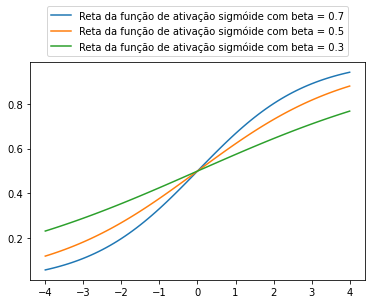

In [66]:
# Plot do grafico da derivada da funcao sigmóide com os valores para beta definidos

beta = np.array([0.7, 0.5, 0.3])
for b in beta:
  eixo_y = np.zeros(len(eixo_x))
  for i in range(len(eixo_x)):
    eixo_y[i] = sigmoide(eixo_x[i], b)

  plt.plot(eixo_x, eixo_y, label = "Reta da função de ativação sigmóide com beta = {}".format(b))
  plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.28))

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

In [72]:
# Definição da funcao de ativação linear purelin
def linar_purelin(x):
  ans = x
  return ans

# Definição da derivada da funcao de ativação linear purelin
def derivada_linar_purelin(x):
  return 1

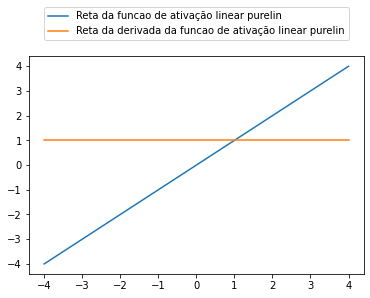

In [74]:
# Plot do grafico da funcao purelin para intervalo predefinido

eixo_y = np.zeros(len(eixo_x))
eixo_y_derivado = np.zeros(len(eixo_x))
for i in range(len(eixo_x)):
  eixo_y[i] = linar_purelin(eixo_x[i])
  eixo_y_derivado[i] = derivada_linar_purelin(eixo_x[i])

plt.plot(eixo_x, eixo_y, label = "Reta da funcao de ativação linear purelin")
plt.plot(eixo_x, eixo_y_derivado, label = "Reta da derivada da funcao de ativação linear purelin")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25))

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

In [63]:
# Definição da funcao de ativação Tangente Hiperbólica
def tanh(x):
  return math.tanh(x)

# Definição da derivada da funcao de ativação tangente hiperbolica
def derivada_tanh(x):
  num = 1
  den = pow(math.cosh(x), 2)
  ans = num/den
  return ans

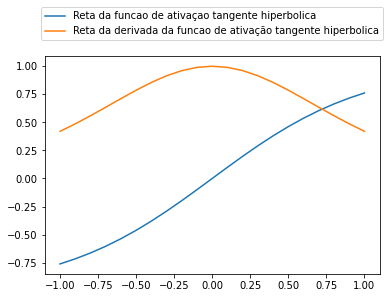

In [79]:
# Plot do grafico da funcao Tangente Hiperbólica para intervalo predefinido [-1, 1]

x = np.arange(-1.0, 1.1, 0.1)   
eixo_y = np.zeros(len(x))
eixo_y_derivado = np.zeros(len(x))
for i in range(len(x)):
  eixo_y[i] = tanh(x[i])
  eixo_y_derivado[i] = derivada_tanh(x[i])

plt.plot(x, eixo_y, label = "Reta da funcao de ativaçao tangente hiperbolica")
plt.plot(x, eixo_y_derivado, label = "Reta da derivada da funcao de ativação tangente hiperbolica")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25))

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU